# Lesson 11 Assignment
### Jessica Kunkel

As usual, I run the shebang line first.

In [1]:
#!/usr/bin/env python

#### Context

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa, and Canadian, 70 elements each, randomly selected for 
the experiment. High-quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combined harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin. 

#### Attribute Information

To construct the data, seven geometric parameters of wheat kernels were measured: 
1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel, 
5. width of kernel, 
6. asymmetry coefficient 
7. length of kernel groove. 

In [2]:
""" Import the os module and set the working directory to where the 
mtcars.csv file is saved """

import os
path = r"C:\Users\jkunk\OneDrive\Documents\_SWENG Masters\9 DAAN 862 - Analytics Programming Python"
os.chdir(path)
os.environ["OMP_NUM_THREADS"] = '1'

In [3]:
""" Import NumPy, pandas, dataframe, matplotlib """
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

### 1. Explore the data set.

In [4]:
columns = ['Area', 'Perimeter', 'Compactness', 'Length', 'Width', 'Asymmetry', 'Groove Length', 'Classification']
seeds = pd.read_csv('seeds_dataset.csv', header=None, names=columns)

The csv file did not include headers, so the column names came from the context given in the assignment description.

In [5]:
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            210 non-null    float64
 1   Perimeter       210 non-null    float64
 2   Compactness     210 non-null    float64
 3   Length          210 non-null    float64
 4   Width           210 non-null    float64
 5   Asymmetry       210 non-null    float64
 6   Groove Length   210 non-null    float64
 7   Classification  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


There are 210 entries and no null values, so there is no need for data cleaning.

In [6]:
seeds.head()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove Length,Classification
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


The first five rows of the data show that the units and scale of the length, width, area, perimeter, and groove length are all likely the same, but the compactness value and asymmetry value may be on a different scale. The dataset and context do not provide units for the columns.

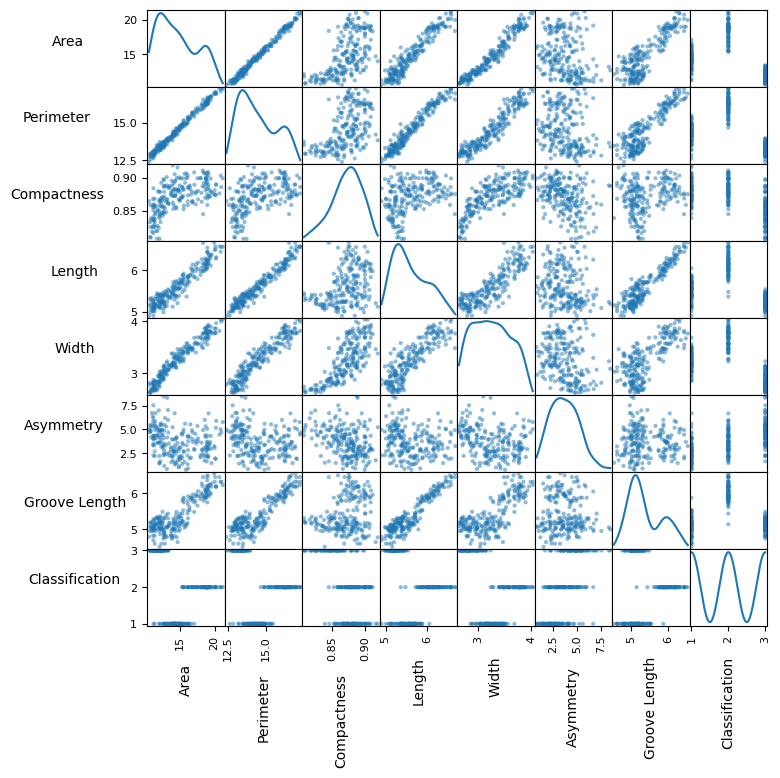

In [7]:
fig = pd.plotting.scatter_matrix(seeds, figsize=[8,8], diagonal='kde')
for ax in fig.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation=90, labelpad=10) 
    ax.set_ylabel(ax.get_ylabel(), rotation=0, labelpad=40)

plt.show()

- As can be expected from the mathematical calculation of area and perimeter, there is a strong positive correlation between area and perimeter, area and length, area and width, perimeter and length, and perimeter and width. 
- There is also a positive correlation between groove length and area, perimeter, and seed length. There are positive correlations between length and width, as well as compactness and width.
- The area attribute has two peaks on the KDE graph, around 5 and 18.
- The perimeter attribute has two peaks on the KDE graph, around 13.5 and 16.
- The compactness attribute has one peak, around 0.87.
- The length attribute has one peak, around 5.25.
- The width attribute does not have an obvious peak, with a relatively consistent spread of data points between 3 and 4.
- The asymmetry attribute has one peak around 3.5 or 4.
- The groove length attribute has a large peak around 5 and a much smaller peak around 6.
- The classification attribute (dependent variable) has 3 even peaks at 1, 2, and 3, showing an even spread of data between the three classifications.

In [8]:
seeds.describe()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove Length,Classification
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


- The area attribute has a mean of 14.85, standard deviation of 2.91, minimum of 10.59, and maximum of 21.18.
- The perimeter attribute has a mean of 14.56, standard deviation of 1.306, minimum of 12.41, and maximum of 17.25.
- The compactness attribute has a mean of 0.871, standard deviation of 0.02363, minimum of 0.8081, and maximum of 0.9183.
- The length attribute has a mean of 5.629, standard deviation of 0.4431, minimum of 4.899, and maximum of 6.675.
- The width attribute has a mean of 3.259, standard deviation of 0.3777, minimum of 2.630, and maximum of 4.033.
- The asymmetry attribute has a mean of 3.700, standard deviation of 1.504, minimum of 0.7651, and maximum of 8.456.
- The groove length attribute has a mean of 5.408, standard deviation of 0.4915, minimum of 4.519, and maximum of 6.550.
- The descriptive statistics are not as helpful for the classification attribute.

In [9]:
seeds.corrwith(seeds.Classification)

Area             -0.346058
Perimeter        -0.327900
Compactness      -0.531007
Length           -0.257269
Width            -0.423463
Asymmetry         0.577273
Groove Length     0.024301
Classification    1.000000
dtype: float64

From the correlation computation, the indpendent variables with the highest, if modest, correlations with Classification are Asymmetry (0.5773) and Compactness (-0.5310). These are the variables that will be used to show scatterplots of clustering to compare between the dataset and each clustering method.

#### Data Preparation
The data was prepared by normalizing the independent variables and splitting the data into X and y.

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(seeds.iloc[:, 0:7])
y = seeds['Classification']

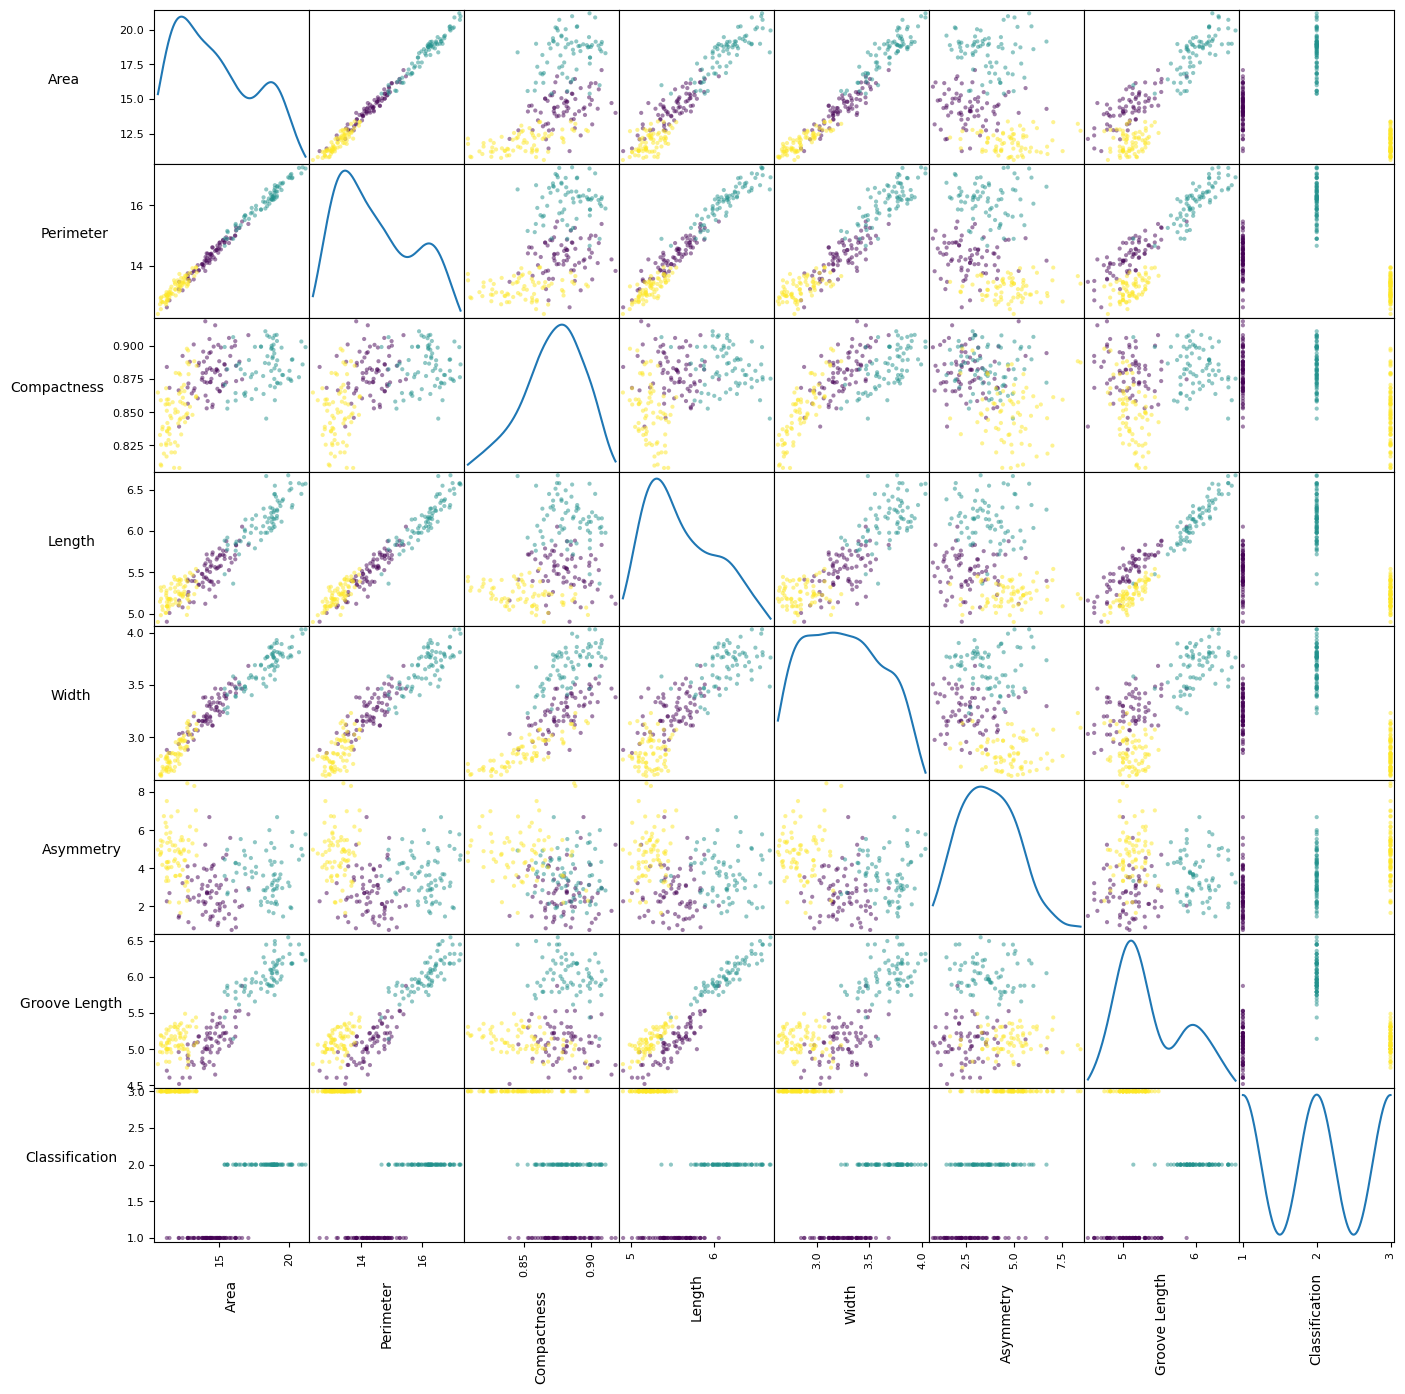

In [11]:
fig = pd.plotting.scatter_matrix(seeds, figsize=[16,16], diagonal='kde', c=y)
for ax in fig.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation=90, labelpad=10) 
    ax.set_ylabel(ax.get_ylabel(), rotation=0, labelpad=40)

plt.show()

From visual inspection, there appear to be relatively distinct clusters in the graphs using groove length and area, as well as area and asymmetry. So I will use these two graphs to compare the data to the clustering algorithm performance.

### 2. Use K-means clustering to group the seed data. 

In [12]:
# import necessary packages
from sklearn.cluster import KMeans
from sklearn import metrics

# Initialize kmeans clustering class using 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
k_pred = kmeans.fit_predict(X)

# evaluate performance
k_homog = metrics.homogeneity_score(y, k_pred)
k_complete = metrics.completeness_score(y, k_pred)
k_adrand = metrics.adjusted_rand_score(y, k_pred)
k_silhou = metrics.silhouette_score(X, k_pred, metric='euclidean')

k_scores = pd.Series({'Homogeneity Score': k_homog, 
            'Completeness Score': k_complete,
            'Adjusted Random Index': k_adrand,
            'Silhouette Score': k_silhou})

k_scores

Homogeneity Score        0.664431
Completeness Score       0.666456
Adjusted Random Index    0.693403
Silhouette Score         0.422127
dtype: float64

In order to determine which indpendent variables would be best to show on the scatter plot comparison of the data to the clustering algorithm, I decided to generate another scatterplot matrix, this time using the classification (y) as the color value. 

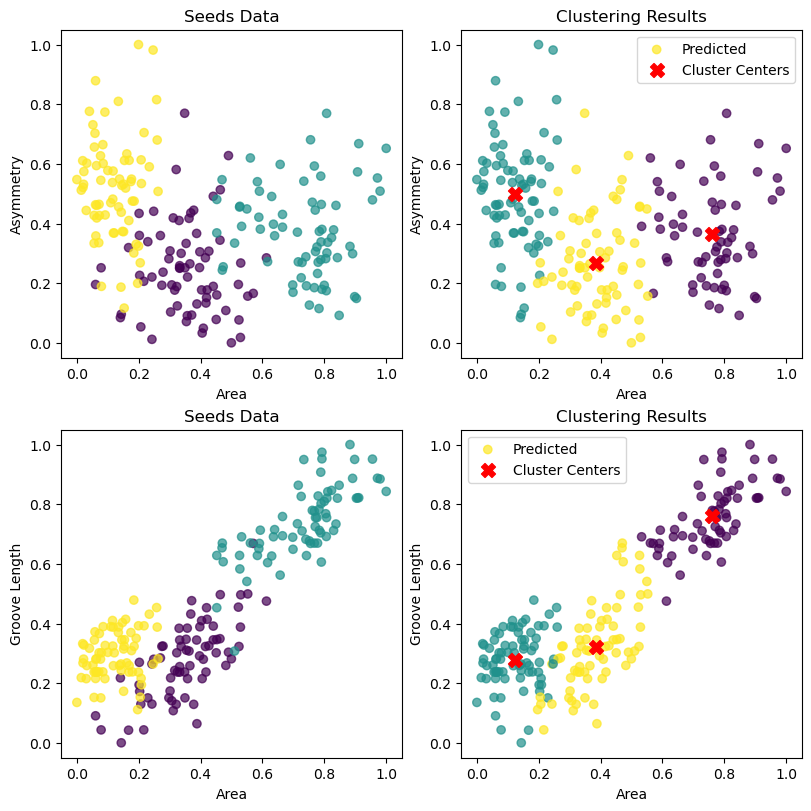

In [13]:
centers = kmeans.cluster_centers_
centers_ar = centers[:,0]
centers_as = centers[:,5]
centers_gl = centers[:,6]

axd = plt.figure(layout="constrained", figsize=(8,8)).subplot_mosaic(
    """
    AB
    CD
    """
)

ax = axd['A']
ax.scatter(X[:,0], X[:,5], c=y, alpha=0.7)
ax.set_xlabel('Area')
ax.set_ylabel('Asymmetry')
ax.set_title('Seeds Data')

ax = axd['B']
ax.scatter(X[:,0], X[:,5], c=k_pred, alpha=0.7, label='Predicted')
ax.scatter(centers_ar, centers_as, s=100, c='r', marker='X', label='Cluster Centers')
ax.set_xlabel('Area')
ax.set_ylabel('Asymmetry')
ax.set_title('Clustering Results')
ax.legend()

ax = axd['C']
ax.scatter(X[:,0], X[:,6], c=y, alpha=0.7)
ax.set_xlabel('Area')
ax.set_ylabel('Groove Length')
ax.set_title('Seeds Data')

ax = axd['D']
ax.scatter(X[:,0], X[:,6], c=k_pred, alpha=0.7, label='Predicted')
ax.scatter(centers_ar, centers_gl, s=100, c='r', marker='X', label='Cluster Centers')
ax.set_xlabel('Area')
ax.set_ylabel('Groove Length')
ax.set_title('Clustering Results')
ax.legend()

plt.show()

From visual inspection, you can see that the KMeans clustering model appears to accurately predict a large portion of the classifications near the centers of the clusters, but does not do as well with outliers in overlapping clusters. The KMeans model draws more distinct boundaries between clusters. 

### 3. Use different linkage types for Hierarchical clustering to the seed data, which linkage type gives the best result?

In [14]:
from sklearn.cluster import AgglomerativeClustering

# Linkage Type = Average
hier_avg = AgglomerativeClustering(
    n_clusters=3,
    linkage='average'
)
hier_avg_pred = hier_avg.fit_predict(X)

hier_avg_scores = DataFrame({
    'Linkage': ['Average'],
    'Homogeneity Score': [metrics.homogeneity_score(y, hier_avg_pred)], 
    'Completeness Score': [metrics.completeness_score(y, hier_avg_pred)],
    'Adjusted Random Index': [metrics.adjusted_rand_score(y, hier_avg_pred)],
    'Silhouette Score': [metrics.silhouette_score(X, hier_avg_pred, metric='euclidean')]})


# Linkage Type = Complete
hier_com = AgglomerativeClustering(
    n_clusters=3,
    linkage='complete'
)
hier_com_pred = hier_com.fit_predict(X)

hier_com_scores = DataFrame({
    'Linkage': ['Complete'],
    'Homogeneity Score': [metrics.homogeneity_score(y, hier_com_pred)], 
    'Completeness Score': [metrics.completeness_score(y, hier_com_pred)],
    'Adjusted Random Index': [metrics.adjusted_rand_score(y, hier_com_pred)],
    'Silhouette Score': [metrics.silhouette_score(X, hier_com_pred, metric='euclidean')]})

# Linkage Type = Ward
hier_ward = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)
hier_ward_pred = hier_ward.fit_predict(X)

hier_ward_scores = DataFrame({
    'Linkage': ['Ward'],
    'Homogeneity Score': [metrics.homogeneity_score(y, hier_ward_pred)], 
    'Completeness Score': [metrics.completeness_score(y, hier_ward_pred)],
    'Adjusted Random Index': [metrics.adjusted_rand_score(y, hier_ward_pred)],
    'Silhouette Score': [metrics.silhouette_score(X, hier_ward_pred, metric='euclidean')]})


compare_scores = pd.concat([hier_avg_scores, hier_com_scores, hier_ward_scores], ignore_index=True)
compare_scores

,Linkage,Homogeneity Score,Completeness Score,Adjusted Random Index,Silhouette Score
0,Average,0.701672,0.709824,0.724724,0.394375
1,Complete,0.608817,0.635687,0.566382,0.363798
2,Ward,0.682599,0.697531,0.675209,0.381037


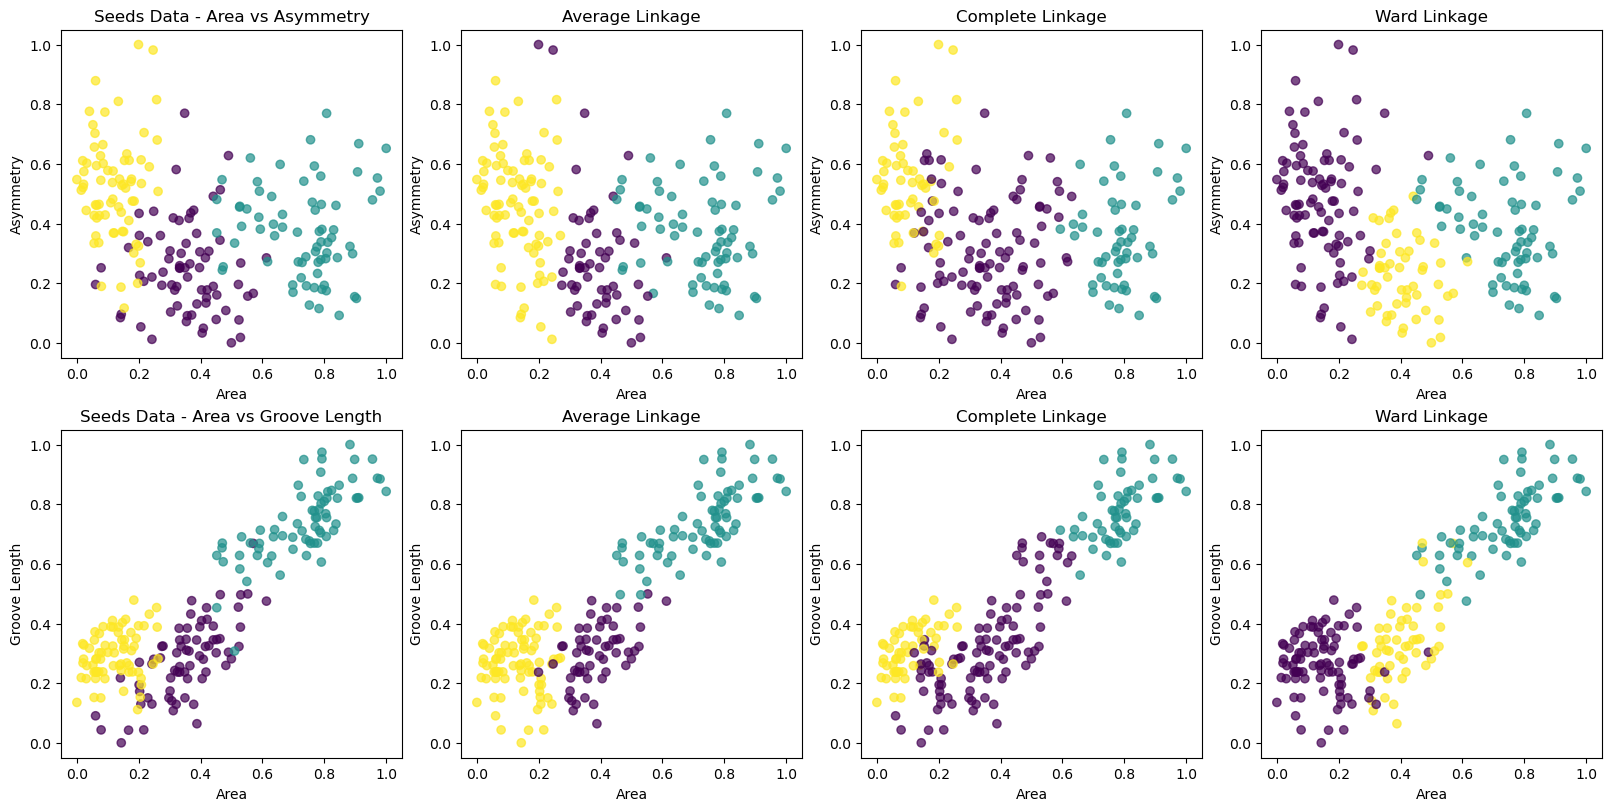

In [15]:
axd = plt.figure(layout="constrained", figsize=(16,8)).subplot_mosaic(
    """
    ABCD
    EFGH
    """
)

ax = axd['A']
ax.scatter(X[:,0], X[:,5], c=y, alpha=0.7)
ax.set_xlabel('Area')
ax.set_ylabel('Asymmetry')
ax.set_title('Seeds Data - Area vs Asymmetry')

ax = axd['B']
ax.scatter(X[:,0], X[:,5], c=hier_avg_pred, alpha=0.7)
ax.set_xlabel('Area')
ax.set_ylabel('Asymmetry')
ax.set_title('Average Linkage')

ax = axd['C']
ax.scatter(X[:,0], X[:,5], c=hier_com_pred, alpha=0.7)
ax.set_xlabel('Area')
ax.set_ylabel('Asymmetry')
ax.set_title('Complete Linkage')

ax = axd['D']
ax.scatter(X[:,0], X[:,5], c=hier_ward_pred, alpha=0.7)
ax.set_xlabel('Area')
ax.set_ylabel('Asymmetry')
ax.set_title('Ward Linkage')

ax = axd['E']
ax.scatter(X[:,0], X[:,6], c=y, alpha=0.7)
ax.set_xlabel('Area')
ax.set_ylabel('Groove Length')
ax.set_title('Seeds Data - Area vs Groove Length')

ax = axd['F']
ax.scatter(X[:,0], X[:,6], c=hier_avg_pred, alpha=0.7)
ax.set_xlabel('Area')
ax.set_ylabel('Groove Length')
ax.set_title('Average Linkage')

ax = axd['G']
ax.scatter(X[:,0], X[:,6], c=hier_com_pred, alpha=0.7)
ax.set_xlabel('Area')
ax.set_ylabel('Groove Length')
ax.set_title('Complete Linkage')

ax = axd['H']
ax.scatter(X[:,0], X[:,6], c=hier_ward_pred, alpha=0.7)
ax.set_xlabel('Area')
ax.set_ylabel('Groove Length')
ax.set_title('Ward Linkage')

plt.show()

Based on the recorded homogeneity score, completeness score, adjusted random index, and silhouette score, the linkage method with the best performance is Average linkage, which has the greatest value for each metric (homogeneity = 0.7017, completeness = 0.7098, ARI = 0.7247, silhouette = 0.3944). 

Visually inspecting the graphs, you can also see that the Average Linkage clustering looks the most similar to the true clusters in the data, compared to Complete and Ward linkage.

### 4. Use DBscan clustering group the seed data and find the best epses and min_samples value. 

In [16]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
db_pred = dbscan.fit_predict(X)
n_clusters = np.unique(dbscan.labels_).size

dbscan_scores = DataFrame({
    'EPS': [0.2],
    'Min Samples': [5],
    'Number of clusters': [n_clusters],
    'Homogeneity Score': [metrics.homogeneity_score(y, db_pred)], 
    'Completeness Score': [metrics.completeness_score(y, db_pred)],
    'Adjusted Random Index': [metrics.adjusted_rand_score(y, db_pred)],
    'Silhouette Score': [metrics.silhouette_score(X, db_pred, metric='euclidean')]})
dbscan_scores

,EPS,Min Samples,Number of clusters,Homogeneity Score,Completeness Score,Adjusted Random Index,Silhouette Score
0,0.2,5,5,0.464203,0.459209,0.383863,0.079373


Since the true number of clusters in the dataset is 3, the DBScan method with eps = 0.2 and min_samples = 5 is not an accurate clustering method for the seed data. 

The next portion is to try to optimize eps and min_samples values:

In [17]:
eps = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
min_samples = [1, 2, 3, 4, 5, 10, 15, 20]

compare_scores = dbscan_scores

for i in eps:
    for j in min_samples:
        model = DBSCAN(eps=i, min_samples=j)
        y_pred_temp = model.fit_predict(X)
        n_clusters = np.unique(model.labels_).size
        if n_clusters <= 1:
            continue
        compare_temp = DataFrame({
            'EPS': [i],
            'Min Samples': [j],
            'Number of clusters': [n_clusters],
            'Homogeneity Score': [metrics.homogeneity_score(y, y_pred_temp)], 
            'Completeness Score': [metrics.completeness_score(y, y_pred_temp)],
            'Adjusted Random Index': [metrics.adjusted_rand_score(y, y_pred_temp)],
            'Silhouette Score': [metrics.silhouette_score(X, y_pred_temp, metric='euclidean')]})
        compare_scores = pd.concat([compare_scores, compare_temp], ignore_index=True)
        
compare_scores

,EPS,Min Samples,Number of clusters,Homogeneity Score,Completeness Score,Adjusted Random Index,Silhouette Score
0,0.20,5,5,0.464203,0.459209,0.383863,0.079373
1,0.10,1,164,0.973697,0.215239,0.013364,0.091156
2,0.10,2,27,0.316834,0.200970,0.006820,-0.313760
3,0.10,3,11,0.168077,0.201151,0.012738,-0.430764
4,0.10,4,2,0.019387,0.225835,0.001115,-0.260404
5,0.15,1,69,0.925523,0.334938,0.360499,-0.087170
6,0.15,2,17,0.689457,0.372440,0.351780,-0.042829
7,0.15,3,9,0.612550,0.396470,0.340460,-0.012462
8,0.15,4,7,0.525603,0.393486,0.291441,-0.035807
9,0.15,5,6,0.487945,0.386921,0.246878,-0.107159


In [18]:
filtered = compare_scores.loc[compare_scores['Number of clusters']==3]
filtered

,EPS,Min Samples,Number of clusters,Homogeneity Score,Completeness Score,Adjusted Random Index,Silhouette Score
19,0.25,2,3,0.022202,0.122185,0.000121,-0.025705
24,0.25,15,3,0.423391,0.473582,0.396400,0.293632
26,0.30,1,3,0.010855,0.113550,0.000004,-0.050488
27,0.30,2,3,0.010855,0.113550,0.000004,-0.050488
28,0.30,3,3,0.010855,0.113550,0.000004,-0.050488


The results were filtered to only include runs where the number of samples = 3, as is the case in the seeds dataset. The filtered results of the exploration of eps and min_samples values shows the best scores with eps = 0.25 and min_samples = 15. 

The next portion focuses around those values:

In [19]:
eps = np.arange(0.2, 0.31, 0.01)
min_samples = range(10,21)

compare_scores1 = dbscan_scores

for i in eps:
    for j in min_samples:
        model = DBSCAN(eps=i, min_samples=j)
        y_pred_temp = model.fit_predict(X)
        n_clusters = np.unique(model.labels_).size
        if n_clusters <= 1:
            continue
        compare_temp = DataFrame({
            'EPS': [i],
            'Min Samples': [j],
            'Number of clusters': [n_clusters],
            'Homogeneity Score': [metrics.homogeneity_score(y, y_pred_temp)], 
            'Completeness Score': [metrics.completeness_score(y, y_pred_temp)],
            'Adjusted Random Index': [metrics.adjusted_rand_score(y, y_pred_temp)],
            'Silhouette Score': [metrics.silhouette_score(X, y_pred_temp, metric='euclidean')]})
        compare_scores1 = pd.concat([compare_scores1, compare_temp], ignore_index=True)


filtered1 = compare_scores1.loc[compare_scores1['Number of clusters']==3]
filtered1

,EPS,Min Samples,Number of clusters,Homogeneity Score,Completeness Score,Adjusted Random Index,Silhouette Score
8,0.20,17,3,0.175025,0.307066,0.066396,-0.149445
19,0.21,19,3,0.187319,0.312901,0.072304,-0.131278
21,0.22,10,3,0.404884,0.432731,0.333801,0.238874
22,0.22,11,3,0.400697,0.426949,0.328457,0.234941
23,0.22,12,3,0.395494,0.418362,0.319983,0.217993
32,0.23,10,3,0.466296,0.527794,0.423809,0.296902
33,0.23,11,3,0.433583,0.480031,0.374392,0.273433
34,0.23,12,3,0.431688,0.471457,0.370248,0.267019
43,0.24,10,3,0.402884,0.473393,0.398634,0.328414
44,0.24,11,3,0.402535,0.469412,0.397450,0.320759


In [20]:
filtered_df_combined = compare_scores1[(compare_scores1['Number of clusters']==3) & (compare_scores1['Homogeneity Score']>0.46)]
filtered_df_combined

,EPS,Min Samples,Number of clusters,Homogeneity Score,Completeness Score,Adjusted Random Index,Silhouette Score
32,0.23,10,3,0.466296,0.527794,0.423809,0.296902
83,0.27,17,3,0.462031,0.553691,0.433194,0.340363


Exploring the eps and min_samples values around eps = 0.25 and min_samples = 15 and filtering those down to the highest scores, I found the best eps score is 0.27 and the best value for min_samples is 17, giving a homogeneity score = 0.462, Completeness Score = 0.554, ARI = 0.433, and Silhouette Score = 0.340. While eps = 0.23 and min_samples = 10 gives a higher homogeneity score (0.466), the rest of the scores, including the Silhouette Score were higher for the selected eps and min_samples values.

*Overall, the best eps score is 0.27 and the best value for min_samples is 17.*

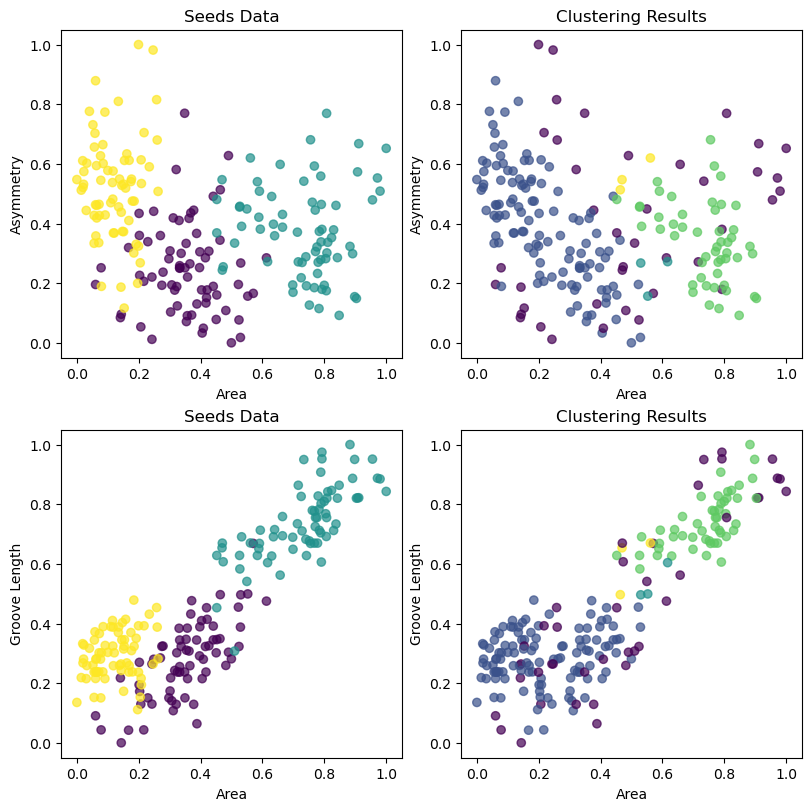

In [22]:
dbscan_best = DBSCAN(eps=0.27, min_samples=17)
db_pred_best = dbscan.fit_predict(X)

axd = plt.figure(layout="constrained", figsize=(8,8)).subplot_mosaic(
    """
    AB
    CD
    """
)

ax = axd['A']
ax.scatter(X[:,0], X[:,5], c=y, alpha=0.7)
ax.set_xlabel('Area')
ax.set_ylabel('Asymmetry')
ax.set_title('Seeds Data')

ax = axd['B']
ax.scatter(X[:,0], X[:,5], c=db_pred_best, alpha=0.7)
ax.set_xlabel('Area')
ax.set_ylabel('Asymmetry')
ax.set_title('Clustering Results')

ax = axd['C']
ax.scatter(X[:,0], X[:,6], c=y, alpha=0.7)
ax.set_xlabel('Area')
ax.set_ylabel('Groove Length')
ax.set_title('Seeds Data')

ax = axd['D']
ax.scatter(X[:,0], X[:,6], c=db_pred_best, alpha=0.7)
ax.set_xlabel('Area')
ax.set_ylabel('Groove Length')
ax.set_title('Clustering Results')

plt.show()

Last, I visualized the DBScan clustering with the best eps and min_samples values. The clustering results show that the DBScan method does not do a very good job at identifying the seeds clusters, which aligns with the relatively poor homogeneity score, completeness score, adjusted random index, and silhouette score.  